# Loading Custom Modules

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import sys
sys.path.append('C:/Users/hkimr/Desktop/RPS Project/RPS-Deep-Learning/modules')

from DataLoaders import *
from Visualizations import *
from TrainTest import *

# Defining DataLoaders

## Hyperparameters

In [2]:
batch_size = 200
learning_rate = 0.01
n_epochs = 25
output_neurons = 3

In [3]:
transform = defineDataTransform("train")
train_loader = createDataLoader("data/rps/", transform, batch_size)

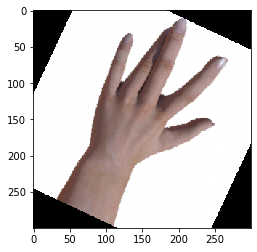

In [4]:
showNumpyAsImg(next(iter(train_loader))[0][0])

# Defining Network Architecture

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 15) # (input_channel_size, output_channel_size, kernel_size)
        self.conv2 = nn.Conv2d(6, 16, 15)
        self.conv3 = nn.Conv2d(16, 16, 15)
        self.pool = nn.MaxPool2d(3, 3) # (kernel_size, stride)
        
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 60)
        self.fc3 = nn.Linear(60, output_neurons)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        x = x.view(-1, 16*4*4) #Flattening the tensor, -1 is the batch size
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

# Training The Network

In [6]:
model = CNN()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

trainNetwork(model, train_loader, n_epochs, optimizer)

Epoch 1, Loss: 7869.770628646016, Final Batch Loss: 1.1813488006591797
Epoch 2, Loss: 14.403545618057251, Final Batch Loss: 1.1508204936981201
Epoch 3, Loss: 14.390156030654907, Final Batch Loss: 1.137130618095398
Epoch 4, Loss: 14.383002758026123, Final Batch Loss: 1.1274070739746094
Epoch 5, Loss: 14.374659538269043, Final Batch Loss: 1.1193588972091675
Epoch 6, Loss: 14.359126091003418, Final Batch Loss: 1.1114634275436401
Epoch 7, Loss: 14.354641556739807, Final Batch Loss: 1.1044026613235474
Epoch 8, Loss: 14.355902910232544, Final Batch Loss: 1.09862220287323
Epoch 9, Loss: 14.347316265106201, Final Batch Loss: 1.0923901796340942
Epoch 10, Loss: 14.345004796981812, Final Batch Loss: 1.0873339176177979
Epoch 11, Loss: 14.343148112297058, Final Batch Loss: 1.082774043083191
Epoch 12, Loss: 14.341507196426392, Final Batch Loss: 1.0786627531051636
Epoch 13, Loss: 14.3404061794281, Final Batch Loss: 1.0749589204788208
Epoch 14, Loss: 14.338807702064514, Final Batch Loss: 1.07161903381